<div id="Top_Header">
    <center>
        <h1>Machine Learning</h1>
        <h3>Subquest ECOC 17</h3>
        <h4> Andreu Masdeu</h4>
    </center>
</div>

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import copy

from ECOClib import * # Here we import all classes from the ECOClib.py

# Toy problem

In [2]:
from sklearn.datasets.samples_generator import make_blobs

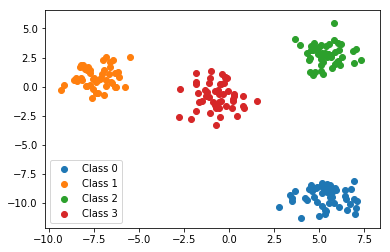

In [4]:
X, y = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=0.9)


indices0 = np.where(y == 0)
indices1 = np.where(y == 1)
indices2 = np.where(y == 2)
indices3 = np.where(y == 3)

plt.scatter(X[indices0,0], X[indices0,1], label='Class 0')
plt.scatter(X[indices1,0], X[indices1,1], label='Class 1')
plt.scatter(X[indices2,0], X[indices2,1], label='Class 2')
plt.scatter(X[indices3,0], X[indices3,1], label='Class 3')
plt.legend()
plt.show()

In [5]:
ECMatrix = np.array([[1,0,1,-1], [-1,1,0,1], [1,-1,1,1], [0, 1,-1,-1]])
print(ECMatrix)

[[ 1  0  1 -1]
 [-1  1  0  1]
 [ 1 -1  1  1]
 [ 0  1 -1 -1]]


# Using SVM

In [6]:
from sklearn import svm

svm_classifier = svm.SVC()

ECOC_classifier = Ecoc(ECMatrix, svm_classifier)

In [7]:
ECOC_classifier.fit(X, y)

### Example of prediction

Input must be shaped as [nb_samples, n_features].

In [37]:
preds = ECOC_classifier.predict(X[34:45], show_code=True)
print("Predictions for these samples are ", preds)
print("True values are", y[34:45])

Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, 1, -1, -1]
Code for this sample is [1, -1, 1, 1]
Predictions for these samples are  [2 2 2 2 0 0 2 2 2 3 2]
True values are [2 2 2 2 0 0 2 2 2 3 2]


# Visualize results

In [9]:
xx,yy = np.meshgrid(np.linspace(-11,11,200),np.linspace(-12,10,200))
viz=np.c_[xx.ravel(),yy.ravel()]

In [10]:
z = ECOC_classifier.predict(viz)

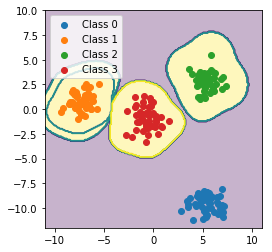

In [13]:
plt.figure()
plt.scatter(X[indices0,0], X[indices0,1], label='Class 0')
plt.scatter(X[indices1,0], X[indices1,1], label='Class 1')
plt.scatter(X[indices2,0], X[indices2,1], label='Class 2')
plt.scatter(X[indices3,0], X[indices3,1], label='Class 3')
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-11,11,-12,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.legend()
plt.show()

In [12]:
ECOC_classifier.evaluate_accuracy(X,y)

Estimated accuracy is 100.0%


1.0

# Using Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

ECOC_classifier2 = Ecoc(ECMatrix, logReg)

In [15]:
ECOC_classifier2.fit(X, y)

In [39]:
preds = ECOC_classifier2.predict(X[34:45], show_code=True)
print("Predictions for these samples are ", preds)
print("True values are", y[34:45])

Code for this sample is [1, -1, 1, -1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [-1, 1, -1, -1]
Code for this sample is [1, -1, 1, 1]
Predictions for these samples are  [0 2 2 2 0 0 2 2 2 3 2]
True values are [2 2 2 2 0 0 2 2 2 3 2]


In [17]:
z = ECOC_classifier2.predict(viz)

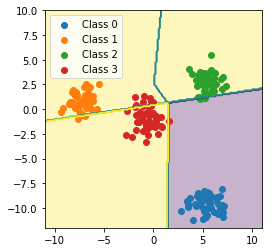

In [18]:
plt.scatter(X[indices0,0], X[indices0,1], label='Class 0')
plt.scatter(X[indices1,0], X[indices1,1], label='Class 1')
plt.scatter(X[indices2,0], X[indices2,1], label='Class 2')
plt.scatter(X[indices3,0], X[indices3,1], label='Class 3')
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-11,11,-12,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.legend()
plt.show()

In [19]:
ECOC_classifier2.evaluate_accuracy(X, y)

Estimated accuracy is 92.5%


0.925

## Check with L1 decoding

We were using decoder L2 by default

In [26]:
logReg = LogisticRegression()

ECOC_classifier3 = Ecoc(ECMatrix, logReg, use_decoding='L1')

In [27]:
ECOC_classifier3.fit(X, y)

In [40]:
preds = ECOC_classifier3.predict(X[34:45], show_code=True)
print("Predictions for these samples are ", preds)
print("True values are", y[34:45])

Code for this sample is [1, -1, 1, -1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, 1, 1, -1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [1, -1, 1, 1]
Code for this sample is [-1, 1, -1, -1]
Code for this sample is [1, -1, 1, 1]
Predictions for these samples are  [0 2 2 2 0 0 2 2 2 3 2]
True values are [2 2 2 2 0 0 2 2 2 3 2]


In [29]:
z = ECOC_classifier3.predict(viz)

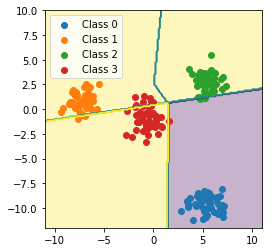

In [30]:
plt.figure()
plt.scatter(X[indices0,0], X[indices0,1], label='Class 0')
plt.scatter(X[indices1,0], X[indices1,1], label='Class 1')
plt.scatter(X[indices2,0], X[indices2,1], label='Class 2')
plt.scatter(X[indices3,0], X[indices3,1], label='Class 3')
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-11,11,-12,10),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.legend()
plt.show()

In [32]:
ECOC_classifier3.evaluate_accuracy(X, y)

Estimated accuracy is 92.5%


0.925